# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

##### Se realiza la carga del archivo y filtrado del día 29 de febrero

###### Utilicé esta ruta, porque la ruta relativa me daba error


In [ ]:

data = pd.read_csv('/workspaces/Practica3/data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

data['Date'] = pd.to_datetime(data['Date'])
data = data[~((data['Date'].dt.month == 2) & (data['Date'].dt.day == 29))]


##### Pasaje de décimas de grados Celsius a grados Celsius, y división de los datos por años

###### Se identifica que las décimas pueden hacer el gráfico dificil de entender, entonces se opta el dividir los valores entre 10, además, con el fin de ordenar los datos, se los divide por años.

In [3]:
# Conversión los valores de Data_Value de décimas de grados Celsius a grados Celsius
data['Data_Value'] = data['Data_Value'] / 10.0

# División de los datos por años
data['Year'] = data['Date'].dt.year
data['DayOfYear'] = data['Date'].dt.strftime('%m-%d')



##### Filtración y obtención de datos

In [4]:
# Filtración de datos para el período 2005-2014 (histórico) y el año 2015
historical_data = data[(data['Year'] >= 2005) & (data['Year'] <= 2014)]
data_2015 = data[data['Year'] == 2015]

# Obtención de los valores récords (máximos y mínimos históricos) por día del año
max_record = historical_data[historical_data['Element'] == 'TMAX'].groupby('DayOfYear')['Data_Value'].max()
min_record = historical_data[historical_data['Element'] == 'TMIN'].groupby('DayOfYear')['Data_Value'].min()

# Identificación los récords superados en 2015
max_2015 = data_2015[data_2015['Element'] == 'TMAX'].groupby('DayOfYear')['Data_Value'].max()
min_2015 = data_2015[data_2015['Element'] == 'TMIN'].groupby('DayOfYear')['Data_Value'].min()

max_broken = max_2015[max_2015 > max_record]
min_broken = min_2015[min_2015 < min_record]


##### Gráfico



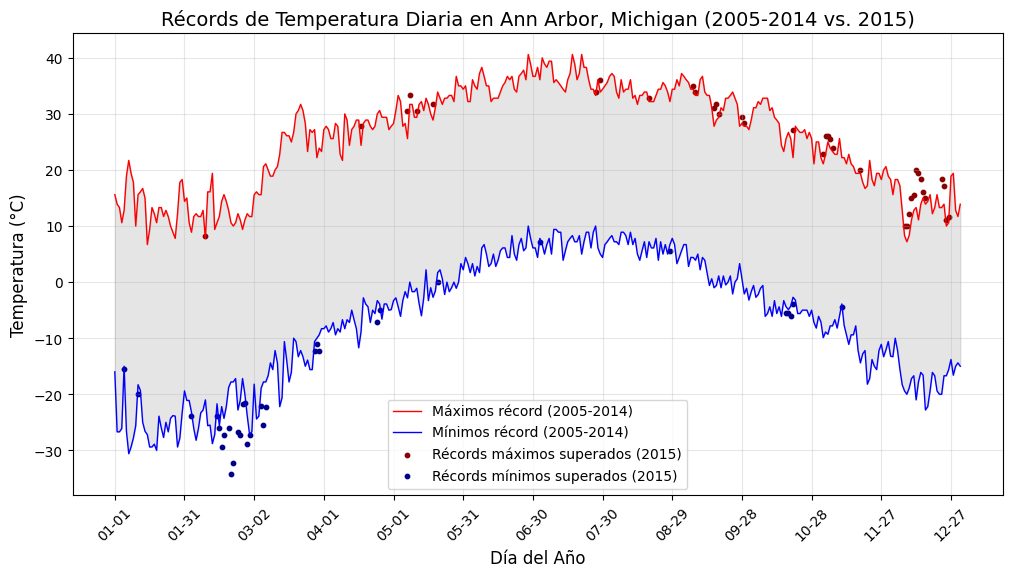

In [ ]:

plt.figure(figsize=(12, 6))


plt.plot(max_record.index, max_record.values, label='Máximos récord (2005-2014)', color='red', linewidth=1)
plt.plot(min_record.index, min_record.values, label='Mínimos récord (2005-2014)', color='blue', linewidth=1)


plt.fill_between(max_record.index, min_record.values, max_record.values, color='gray', alpha=0.2)


plt.scatter(max_broken.index, max_broken.values, color='darkred', label='Récords máximos superados (2015)', s=10)
plt.scatter(min_broken.index, min_broken.values, color='darkblue', label='Récords mínimos superados (2015)', s=10)

# Etiquetas, título y leyenda
plt.title('Récords de Temperatura Diaria en Ann Arbor, Michigan (2005-2014 vs. 2015)', fontsize=14)
plt.xlabel('Día del Año', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xticks(ticks=range(0, len(max_record), 30), labels=max_record.index[::30], rotation=45)
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)

# Mostrar gráfico
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>